In [1]:
from fidlib.basicfunctions import create_heisenberg
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import state_fidelity,Statevector,SparsePauliOp
from qiskit.algorithms import SciPyRealEvolver,TimeEvolutionProblem
import plotly.express as px
import numpy as np

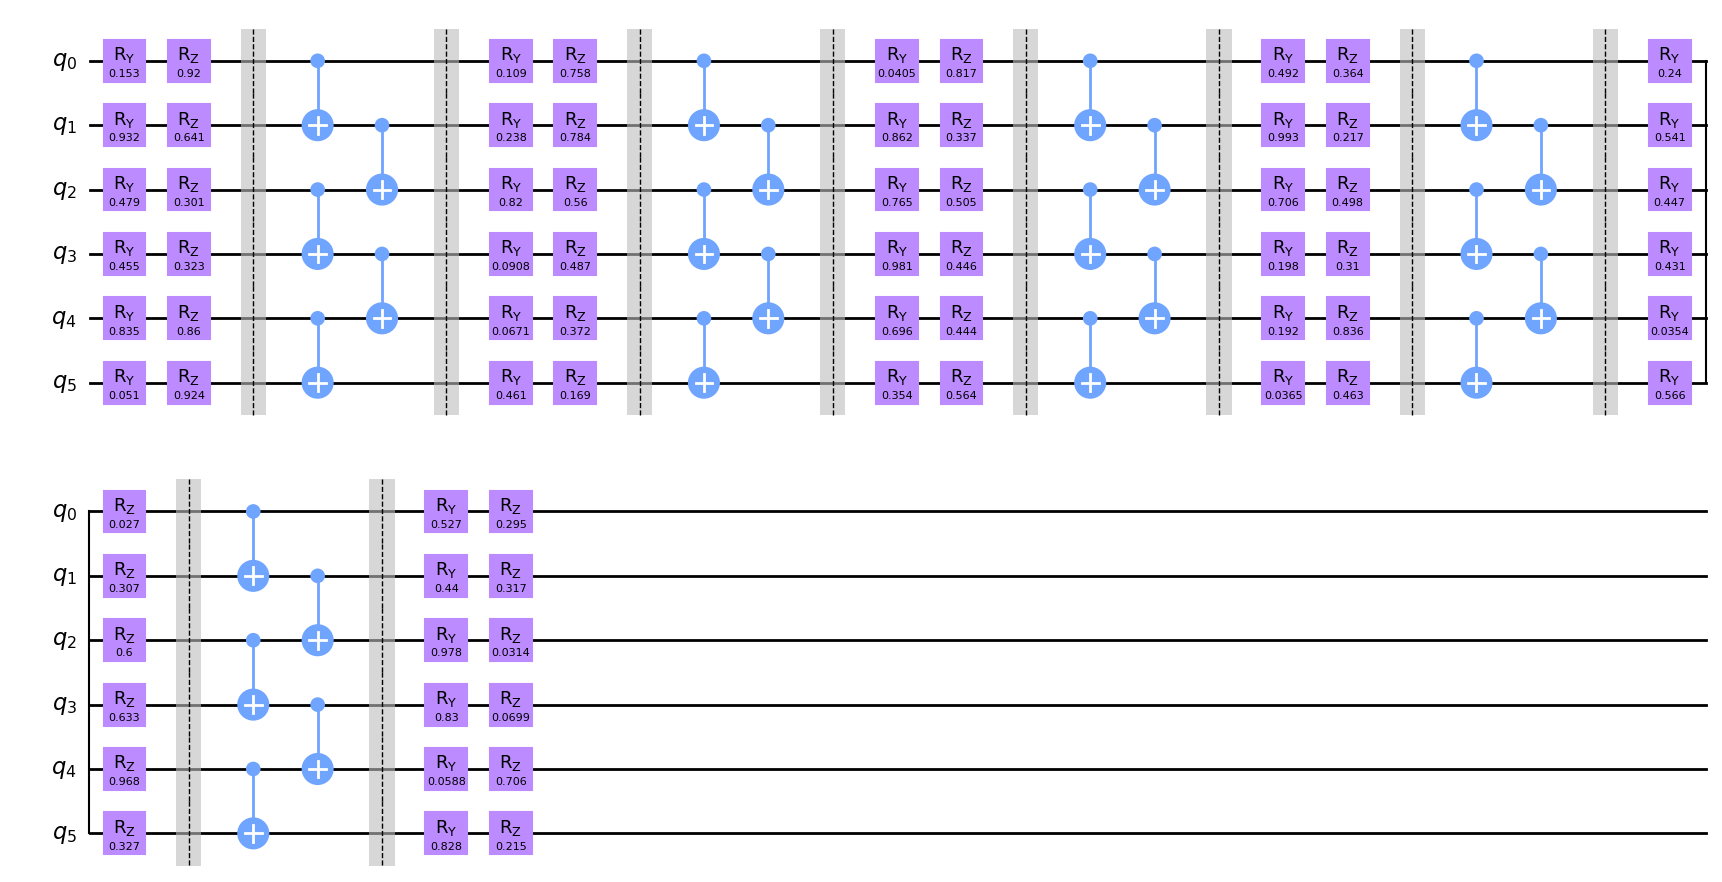

In [2]:
num_qubits=6
qc = EfficientSU2(num_qubits=num_qubits,insert_barriers=True,entanglement="pairwise",reps=5,su2_gates=["ry","rz"])
initial_parameters = np.random.rand(qc.num_parameters)
display(qc.decompose().assign_parameters(initial_parameters).draw(output='mpl'))

In [3]:
initial_state = Statevector(qc.assign_parameters(initial_parameters))
# display(initial_state,output="mpl")

In [4]:
H = create_heisenberg(num_qubits=num_qubits,j_const=4.0,g_const=-1.0)
# display(H)


In [5]:
prob=TimeEvolutionProblem(hamiltonian=H,
                          time=1e-1,
                          initial_state=initial_state,
                          )
solver = SciPyRealEvolver(1)
solution = solver.evolve(prob)
evolved_state=solution.evolved_state
print(f"We start with a state infidelity of {1-state_fidelity(evolved_state,initial_state):.2e} between our previous state and our time-stepped evolved state")

We start with a state infidelity of 6.34e-01 between our previous state and our time-stepped evolved state


In [6]:
from scipy.optimize import minimize

ideal_solution = minimize(
    fun=lambda x: 1-state_fidelity(Statevector(qc.assign_parameters(initial_parameters+x)), evolved_state),
    x0=np.zeros(qc.num_parameters)
    )

In [7]:
eps = 1.5
def ithaca_fidelity(pertsize:float)->float:
    pert_state = Statevector(qc.assign_parameters(initial_parameters+pertsize*ideal_solution.x))
    return state_fidelity(pert_state,evolved_state)
epsilons =np.linspace(-eps,eps,100)
infidelities = 1-np.vectorize(ithaca_fidelity)(epsilons)
df = {"Epsilon":epsilons,"Infidelity":infidelities}
fig = px.line(data_frame=df,x="Epsilon",y="Infidelity")
fig.update_yaxis(range=[0,1])
fig.show()

AttributeError: 'Figure' object has no attribute 'update_yaxis'